In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy.optimize import curve_fit
from scipy.integrate import quad
from astropy.constants import c
from astropy import units as u

In [2]:
# Local file path
df = pd.read_csv(r"D:\code\python\Pantheon+SH0ES.dat")

In [3]:
# Load the file
df = pd.read_csv("Pantheon+SH0ES.dat", sep=r'\s+',)

In [4]:
# See structure
print("shape", df.shape)
print("\ncolumns:", df.columns.tolist())
print(df.head())

shape (1701, 47)

columns: ['CID', 'IDSURVEY', 'zHD', 'zHDERR', 'zCMB', 'zCMBERR', 'zHEL', 'zHELERR', 'm_b_corr', 'm_b_corr_err_DIAG', 'MU_SH0ES', 'MU_SH0ES_ERR_DIAG', 'CEPH_DIST', 'IS_CALIBRATOR', 'USED_IN_SH0ES_HF', 'c', 'cERR', 'x1', 'x1ERR', 'mB', 'mBERR', 'x0', 'x0ERR', 'COV_x1_c', 'COV_x1_x0', 'COV_c_x0', 'RA', 'DEC', 'HOST_RA', 'HOST_DEC', 'HOST_ANGSEP', 'VPEC', 'VPECERR', 'MWEBV', 'HOST_LOGMASS', 'HOST_LOGMASS_ERR', 'PKMJD', 'PKMJDERR', 'NDOF', 'FITCHI2', 'FITPROB', 'm_b_corr_err_RAW', 'm_b_corr_err_VPEC', 'biasCor_m_b', 'biasCorErr_m_b', 'biasCor_m_b_COVSCALE', 'biasCor_m_b_COVADD']
             CID  IDSURVEY      zHD   zHDERR     zCMB  zCMBERR     zHEL  \
0         2011fe        51  0.00122  0.00084  0.00122  0.00002  0.00082   
1         2011fe        56  0.00122  0.00084  0.00122  0.00002  0.00082   
2         2012cg        51  0.00256  0.00084  0.00256  0.00002  0.00144   
3         2012cg        56  0.00256  0.00084  0.00256  0.00002  0.00144   
4  1994DRichmond        50

In [5]:
print("\1columns:", df.columns.tolist())

columns: ['CID', 'IDSURVEY', 'zHD', 'zHDERR', 'zCMB', 'zCMBERR', 'zHEL', 'zHELERR', 'm_b_corr', 'm_b_corr_err_DIAG', 'MU_SH0ES', 'MU_SH0ES_ERR_DIAG', 'CEPH_DIST', 'IS_CALIBRATOR', 'USED_IN_SH0ES_HF', 'c', 'cERR', 'x1', 'x1ERR', 'mB', 'mBERR', 'x0', 'x0ERR', 'COV_x1_c', 'COV_x1_x0', 'COV_c_x0', 'RA', 'DEC', 'HOST_RA', 'HOST_DEC', 'HOST_ANGSEP', 'VPEC', 'VPECERR', 'MWEBV', 'HOST_LOGMASS', 'HOST_LOGMASS_ERR', 'PKMJD', 'PKMJDERR', 'NDOF', 'FITCHI2', 'FITPROB', 'm_b_corr_err_RAW', 'm_b_corr_err_VPEC', 'biasCor_m_b', 'biasCorErr_m_b', 'biasCor_m_b_COVSCALE', 'biasCor_m_b_COVADD']


In [6]:
print(df.columns)

Index(['CID', 'IDSURVEY', 'zHD', 'zHDERR', 'zCMB', 'zCMBERR', 'zHEL',
       'zHELERR', 'm_b_corr', 'm_b_corr_err_DIAG', 'MU_SH0ES',
       'MU_SH0ES_ERR_DIAG', 'CEPH_DIST', 'IS_CALIBRATOR', 'USED_IN_SH0ES_HF',
       'c', 'cERR', 'x1', 'x1ERR', 'mB', 'mBERR', 'x0', 'x0ERR', 'COV_x1_c',
       'COV_x1_x0', 'COV_c_x0', 'RA', 'DEC', 'HOST_RA', 'HOST_DEC',
       'HOST_ANGSEP', 'VPEC', 'VPECERR', 'MWEBV', 'HOST_LOGMASS',
       'HOST_LOGMASS_ERR', 'PKMJD', 'PKMJDERR', 'NDOF', 'FITCHI2', 'FITPROB',
       'm_b_corr_err_RAW', 'm_b_corr_err_VPEC', 'biasCor_m_b',
       'biasCorErr_m_b', 'biasCor_m_b_COVSCALE', 'biasCor_m_b_COVADD'],
      dtype='object')


In [7]:
# Filter for entries with usable data based on the required columns
df_clean = df.dropna(subset=['zHD', 'MU_SH0ES', 'MU_SH0ES_ERR_DIAG'])
print(f"Original rows: {len(df)}")
print(f"Cleaned rows: {len(df_clean)}")

z = df_clean['zHD'].values
mu = df_clean['MU_SH0ES'].values
mu_err = df_clean['MU_SH0ES_ERR_DIAG'].values

print("z shape:", z.shape)
print('mu shape:', mu.shape)
print("mu_err shape:", mu_err.shape)

Original rows: 1701
Cleaned rows: 1701
z shape: (1701,)
mu shape: (1701,)
mu_err shape: (1701,)


In [8]:
print("z:", z.shape, type(z))
print("mu:", mu.shape, type(mu))
print("mu_err:", mu_err.shape, type(mu_err))

z: (1701,) <class 'numpy.ndarray'>
mu: (1701,) <class 'numpy.ndarray'>
mu_err: (1701,) <class 'numpy.ndarray'>


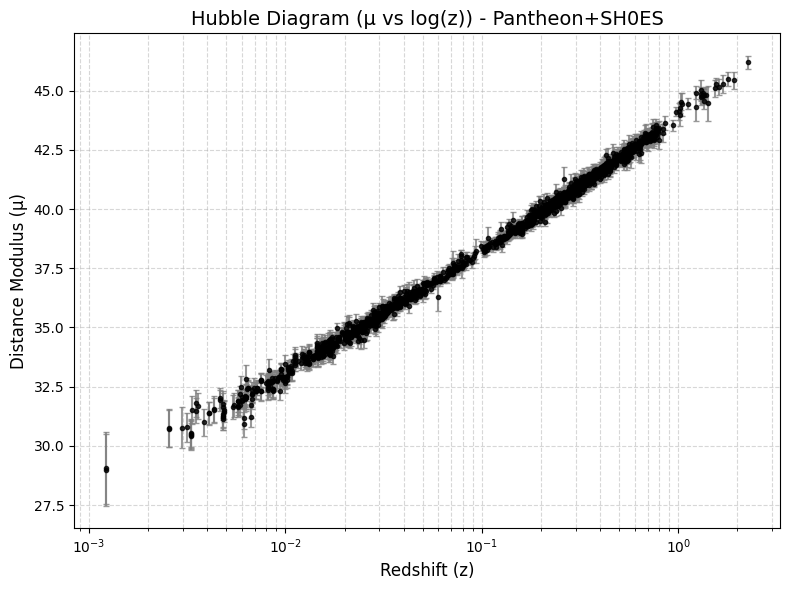

In [9]:
# Write a code to plot the distance modulus and the redshift (x-axis), label them accordingly. 
plt.figure(figsize=(8,6))
plt.errorbar(z, mu, yerr=mu_err, fmt='o', markersize=3, capsize=2, color='black', ecolor='gray', alpha=0.8)
#Try using log scale in x-axis
plt.xscale('log')
plt.xlabel("Redshift (z)", fontsize=12)
plt.ylabel("Distance Modulus (μ)", fontsize=12)
plt.title("Hubble Diagram (μ vs log(z)) - Pantheon+SH0ES", fontsize=14)
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [10]:
# Define the E(z) for flat LCDM
def E(z, Omega_m):
    return np.sqrt(Omega_m * (1 + z)**3 + (1 - Omega_m))

# Luminosity distance in Mpc, try using scipy quad to integrate.
def luminosity_distance(z, H0, Omega_m):
    c = 299792.458
    def integrand(z_prime, Omega_m):
        return 1.0 / E(z_prime, Omega_m)
    # Handle array input
    z = np.atleast_1d(z)
    d_L = []

    for zi in z:
        # Pass Omega_m as an extra argument
        integral, _ = quad(integrand, 0, zi, args=(Omega_m,), epsabs=1e-8)
        d_L.append((c / H0) * (1 + zi) * integral)

    return np.array(d_L)

# Theoretical distance modulus, use above function inside mu_theory to compute luminosity distance 
def mu_theory(z, H0, Omega_m):
    d_L = luminosity_distance(z, H0, Omega_m)
    return 5 * np.log10(d_L) + 25
    

In [11]:
print(z.shape, mu.shape, mu_err.shape)

(1701,) (1701,) (1701,)


In [12]:
# Initial guess: H0 = 70, Omega_m = 0.3
initial_guess = [70, 0.3]

# Write a code for fitting and taking error out of the parameters
params, cov = curve_fit(mu_theory, z, mu, sigma=mu_err, p0=initial_guess, absolute_sigma=True, maxfev=10000)

H0_fit, Omega_m_fit = params
H0_err, Omega_m_err = np.sqrt(np.diag(cov))

print(f"Fitted H0 = {H0_fit:.2f} ± {H0_err:.2f} km/s/Mpc")
print(f"Fitted Omega_m = {Omega_m_fit:.3f} ± {Omega_m_err:.3f}")


Fitted H0 = 72.97 ± 0.26 km/s/Mpc
Fitted Omega_m = 0.351 ± 0.019


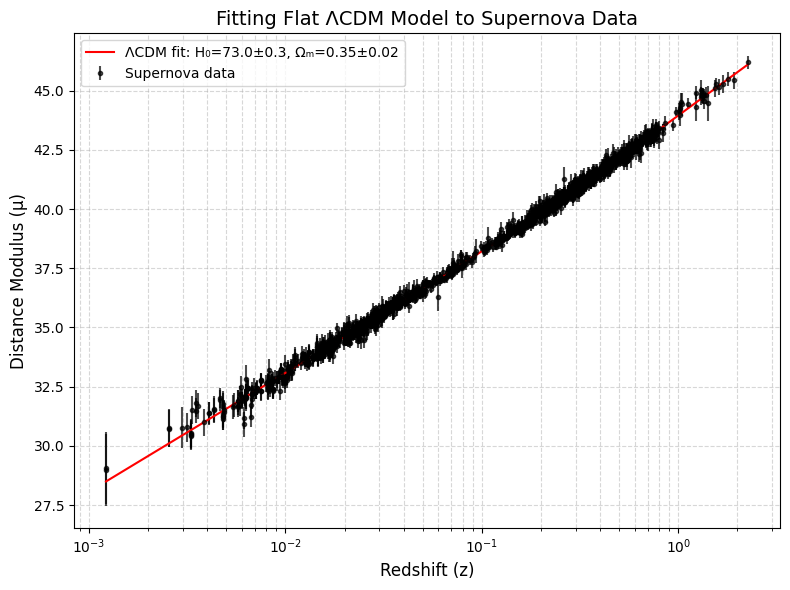

In [13]:
# Plotting Best Fit
z_plot = np.logspace(np.log10(min(z)), np.log10(max(z)), 200)
mu_fit = mu_theory(z_plot, H0_fit, Omega_m_fit)

plt.figure(figsize=(8, 6))
plt.errorbar(z, mu, yerr=mu_err, fmt='o', markersize=3, color='black', alpha=0.7, label='Supernova data')
plt.plot(z_plot, mu_fit, 'r-', label=f"ΛCDM fit: H₀={H0_fit:.1f}±{H0_err:.1f}, Ωₘ={Omega_m_fit:.2f}±{Omega_m_err:.2f}")
plt.xscale('log')
plt.xlabel("Redshift (z)", fontsize=12)
plt.ylabel("Distance Modulus (μ)", fontsize=12)
plt.title("Fitting Flat ΛCDM Model to Supernova Data", fontsize=14)
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

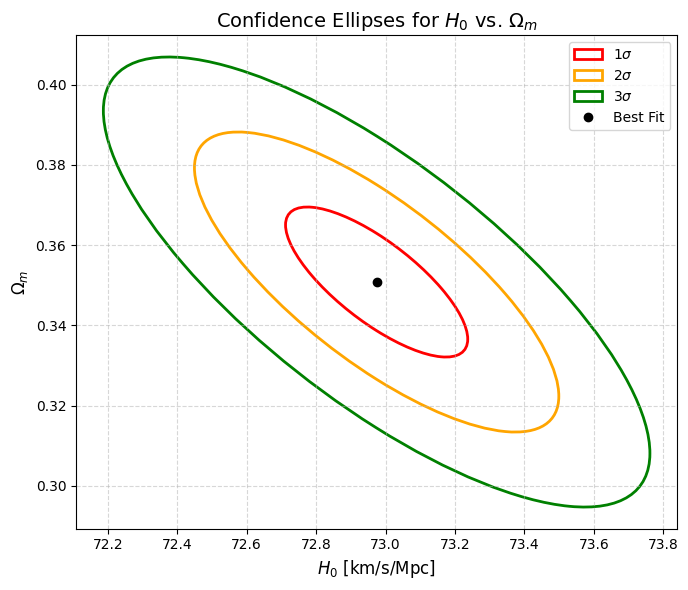

In [14]:
def plot_confidence_ellipse(mean, cov, ax, n_std=1.0, facecolor='none', edgecolor='red', **kwargs):
    """Create a confidence ellipse of width/height/angle from covariance matrix"""
    
    # Eigenvalues and eigenvectors of covariance
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals = vals[order]
    vecs = vecs[:, order]

    # Compute angle of ellipse
    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))

    # Width and height of the ellipse
    width, height = 2 * n_std * np.sqrt(vals)

    ellipse = Ellipse(xy=mean, width=width, height=height,
                      angle=theta, edgecolor=edgecolor, facecolor=facecolor, lw=2, **kwargs)
    ax.add_patch(ellipse)

# Example: use parameters from curve_fit
mean = [H0_fit, Omega_m_fit]       # best-fit values
cov_matrix = cov                   # 2x2 covariance matrix from curve_fit

# Plot the confidence ellipses
fig, ax = plt.subplots(figsize=(7, 6))

# Plot ellipses for 1σ, 2σ, and 3σ
colors = ['red', 'orange', 'green']
labels = [r"1$\sigma$", r"2$\sigma$", r"3$\sigma$"]

for n_std, color, label in zip([1, 2, 3], colors, labels):
    plot_confidence_ellipse(mean, cov_matrix, ax, n_std=n_std, edgecolor=color, label=label)

# Mark best-fit point
ax.plot(H0_fit, Omega_m_fit, 'ko', label='Best Fit')

# Labels and formatting
ax.set_xlabel(r"$H_0$ [km/s/Mpc]", fontsize=12)
ax.set_ylabel(r"$\Omega_m$", fontsize=12)
ax.set_title(r"Confidence Ellipses for $H_0$ vs. $\Omega_m$", fontsize=14)
ax.legend()
ax.grid(True, ls='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [15]:
# Write the function for age of the universe as above

def integrand(z, H0, Omega_m):
    return 1.0 / ((1 + z) * E(z, Omega_m))

def age_of_universe(H0, Omega_m):
    integral, _ = quad(integrand, 0, np.inf, args=(H0, Omega_m), epsabs=1e-10, epsrel=1e-10)
    H0_in_s = H0 / (3.085677581e19)
    age_seconds = integral / H0_in_s
    seconds_per_gyr = 3600 * 24 * 365.25 * 1e9
    age_gyr = age_seconds / seconds_per_gyr
    return age_gyr # in Gyr

t0 = age_of_universe(H0_fit, Omega_m_fit)
print(f"Estimated age of Universe: {t0:.2f} Gyr")


Estimated age of Universe: 12.36 Gyr


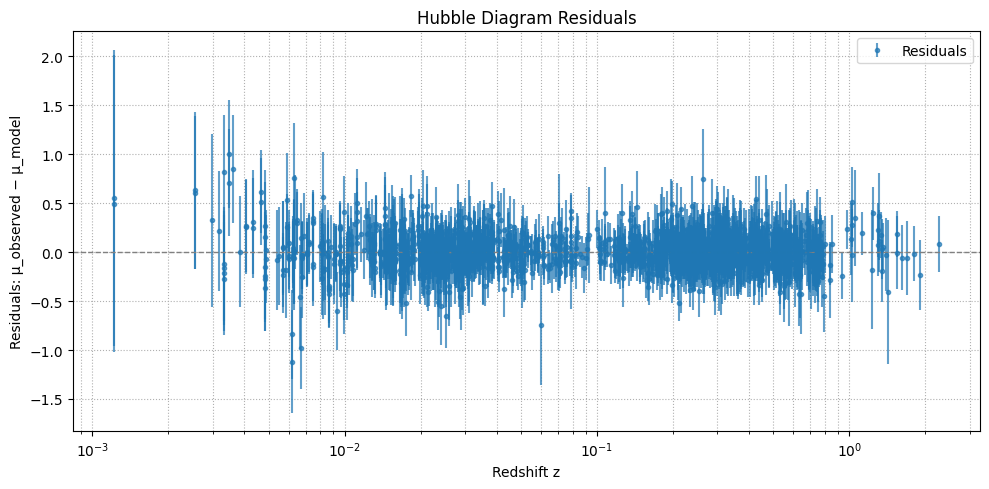

In [16]:
# Write the code to find residual by computing mu_theory and then plot
mu_model = mu_theory(z, *params)
residuals = mu - mu_model
plt.figure(figsize=(10, 5))
plt.errorbar(z, residuals, yerr=mu_err, fmt='o', markersize=3, label='Residuals', alpha=0.7)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xscale('log')  # common for cosmology data
plt.xlabel("Redshift z")
plt.ylabel("Residuals: μ_observed − μ_model")
plt.title("Hubble Diagram Residuals")
plt.legend()
plt.grid(True, which='both', linestyle=':')
plt.tight_layout()
plt.show()

In [17]:
print("Mean residual:", np.mean(residuals))
print("Std deviation:", np.std(residuals))

Mean residual: 0.008819043041647384
Std deviation: 0.17208099861094509


In [18]:
def mu_fixed_Om(z, H0):
    return mu_theory(z, H0, Omega_m=0.3)

# Try fitting with this fixed value
initial_guess = [70]

# Fit only for H0 using fixed Omega_m = 0.3
params, cov = curve_fit(mu_fixed_Om, z, mu, sigma=mu_err,
                        p0=initial_guess, absolute_sigma=True)

# Extract best-fit H0 and its uncertainty
H0_fit = params[0]
H0_err = np.sqrt(np.diag(cov))[0]

print(f"Best-fit H0 (with fixed Ωₘ = 0.3): {H0_fit:.2f} ± {H0_err:.2f} km/s/Mpc")

Best-fit H0 (with fixed Ωₘ = 0.3): 73.53 ± 0.17 km/s/Mpc


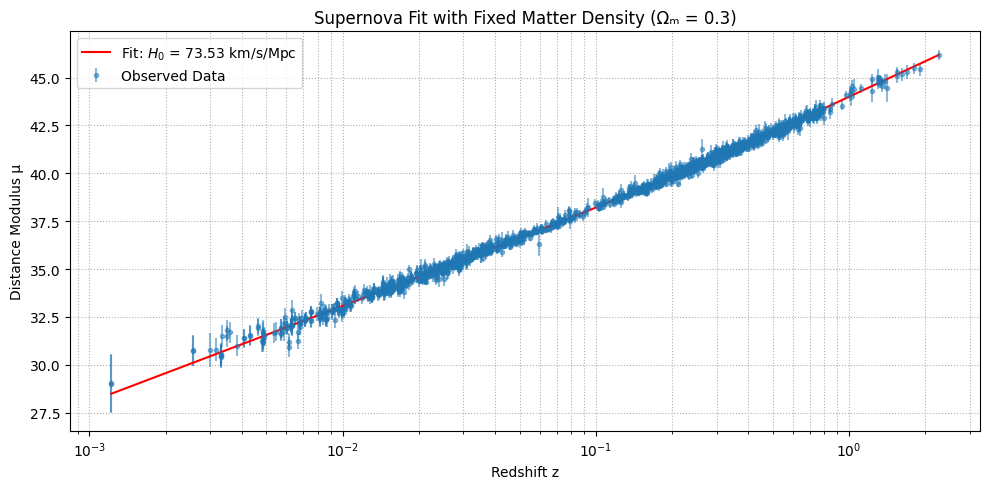

In [19]:
z_plot = np.logspace(np.log10(min(z)), np.log10(max(z)), 500)
mu_fit = mu_fixed_Om(z_plot, H0_fit)

plt.figure(figsize=(10, 5))
plt.errorbar(z, mu, yerr=mu_err, fmt='.', label='Observed Data', alpha=0.5)
plt.plot(z_plot, mu_fit, 'r-', label=f'Fit: $H_0$ = {H0_fit:.2f} km/s/Mpc')
plt.xscale('log')
plt.xlabel('Redshift z')
plt.ylabel('Distance Modulus μ')
plt.title('Supernova Fit with Fixed Matter Density (Ωₘ = 0.3)')
plt.legend()
plt.grid(True, which='both', linestyle=':')
plt.tight_layout()
plt.show()

In [20]:
# Split the data for the three columns and do the fitting again and see
z_split = 0.1

# Low-z subset
mask_low = z < z_split
z_low = z[mask_low]
mu_low = mu[mask_low]
mu_err_low = mu_err[mask_low]

# High-z subset
mask_high = z >= z_split
z_high = z[mask_high]
mu_high = mu[mask_high]
mu_err_high = mu_err[mask_high]
# Fit for low-z
H0_low, cov_low = curve_fit(mu_fixed_Om, z_low, mu_low, sigma=mu_err_low, p0=[70], absolute_sigma=True)
H0_low_val = H0_low[0]
H0_low_err = np.sqrt(np.diag(cov_low))[0]

# Fit for high-z
H0_high, cov_high = curve_fit(mu_fixed_Om, z_high, mu_high, sigma=mu_err_high, p0=[70], absolute_sigma=True)
H0_high_val = H0_high[0]
H0_high_err = np.sqrt(np.diag(cov_high))[0]

print(f"Low-z (z < {z_split}): H₀ = {H0_low[0]:.2f} km/s/Mpc")
print(f"High-z (z ≥ {z_split}): H₀ = {H0_high[0]:.2f} km/s/Mpc")


Low-z (z < 0.1): H₀ = 73.01 km/s/Mpc
High-z (z ≥ 0.1): H₀ = 73.85 km/s/Mpc
